In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from itertools import combinations
from time import sleep, time
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from K_Means.K_Means_Vanilla import Kmeans
from K_Means.K_Means_Boost import KmeansBoost

# Implementation of classic k-means algorithm

# Documents

# **Methods**
* **\__init__** (num_clusters, max_iter, auto_clusters, init) - Construct k-means model 
* **fit(X)** - Defines centroids and label for each object
* **get_params** - Returns dictionary with parameters of model
* **clustering(X)** - The function used to shape pipeline
* **set_centroids(labels)** - Sets centroid's coordinates for each label
* **euclidian_distance(X, dists)** - Computes distances for each object from each centroid using the "euclidian" distance
* **cosine_distance(X, dists)** - Computes distances for each object from each centroid using the "cosine" distance
* **manhattan_distance(X, dists)** - Computes distances for each object from each centroid using the "manhattan" distance
* **predict(X)** - Predicts label for each object
* **init_centroids(X)** - Initializes centroids centers
* **set_auto_clusters(X)** - Tries to find optimal number of clusters using F-metric and gives list of scores for each number of clusters

**P.S.** Here and later I will name the F-metric next ratio:<h4>$$\frac{\Phi_0}{\Phi_1} $$<h4>
where $$\Phi_0 = \sum_{a \in Y}^{}{\frac{1}{|X_a|}}\sum_{i: a_i = a}{\rho(x_i, \mu_a) }$$ 
$$X_a = {\{x_i \in X^l | a_i = a\}} - cluster \:a \:and \:\mu_a - \:a\;'s \:mass \:centr$$ <br>
$$\Phi_1 = \frac{\sum_{a, \:b \:\in \:Y}{\rho(\mu_a, \mu_b)}}{ \frac{|Y| * (|Y| - 1 )}{2}}$$

# **Attributes**
* **self.num_clusters** - The number of cluster
* **self.metric** - The list of F-metric score for number of classes in range: [2 , 15]
* **self.centroids** - The numpy-array of centroids coordinates
* **self.labels** - The numpy-array of labels for train set
* **self.last_fit_dists** - The numpy-array of distances from the class-centroids for last test set
* **self.similiarity** - The function which computes distances by chosen the function of similiarity
* **self.labels_stack and self.centroids_stack** - Two stacks of history for labels and cetroids coordinates 

# Let's see performance of our model on 2D data

**Here you can play with distribution (any from np.random module, just don't forget to set correct parameters) and similiarity function, one of the next:** 
* "euclidian"
* "cosine-distance"
* "manhattan"<h5>
**P.S. if you don't want to change something just run the next cells and enjoy!**

In [2]:
def perfomance_2d(num_clusters):
    for it in range(2, num_clusters + 1):
        df = np.zeros((0,2))
        for i in range(it):
            df = np.vstack((df, np.random.uniform(i, i + 1, size=(500,2))))

        model = Kmeans(num_clusters = it, similiarity="euclidian", max_iter=20)
        model.fit(df)
        df = pd.DataFrame(df)
        df = df.rename(columns={ 0: "x", 1: "y"})
        for i in range(len(model.centroids_stack)):
            plt.figure(figsize= (8, 8))
            sns.scatterplot(data = df, x="x", y="y", hue=model.labels_stack[i] )
            sns.scatterplot(x=model.centroids_stack[i][:, 0], y=model.centroids_stack[i][:, 1], marker="*", s=300)
            plt.show()
            sleep(0.2)
            clear_output(wait=True)
        sleep(2)
       


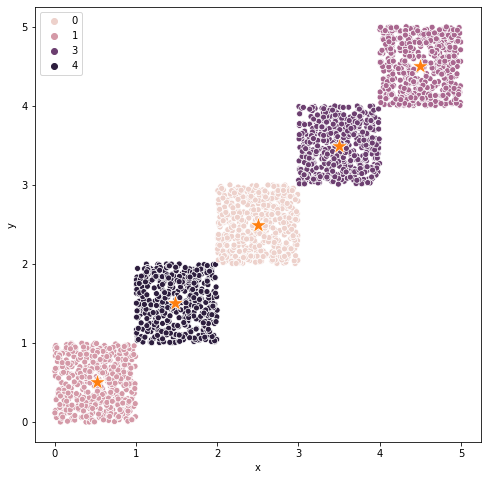

In [3]:
perfomance_2d(5)

# More examples -  perfomance on sklearn dataset blobs

In [4]:
def perfomance_blobs(num_clusters):
    for it in range(2, num_clusters + 1):
        df, _ = make_blobs(n_features=2, n_samples=it * 200, centers=it)
        model = Kmeans(num_clusters = it, similiarity="euclidian", max_iter=20)
        model.fit(df)
        df = pd.DataFrame(df)
        df = df.rename(columns={ 0: "x", 1: "y"})
        for i in range(len(model.centroids_stack)):
            plt.figure(figsize= (8, 8))
            sns.scatterplot(data = df, x="x", y="y", hue=model.labels_stack[i] )
            sns.scatterplot(x=model.centroids_stack[i][:, 0], y=model.centroids_stack[i][:, 1], marker="*", s=300)
            plt.show()
            sleep(0.2)
            clear_output(wait=True)
        sleep(2)
       

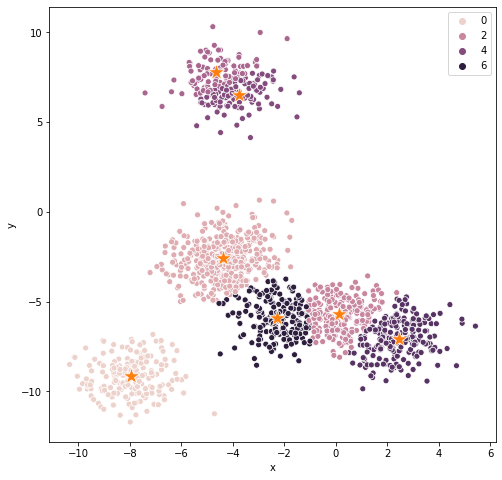

In [5]:
perfomance_blobs(7)

# Let's see perfomance on 3D data

<h4>Here we go again! Welcome to 3D visualisation
<h4>I think you know what you can do: play with parameters or runs cells and enjoy!<h4>

In [6]:
def perfomance_3d(num_clusters):
    for it in range(2, num_clusters + 1):
        df = np.zeros((0,3))
        for i in range(it):
            df = np.vstack((df, np.random.uniform(i, i + 1, size=(500,3))))

        model = Kmeans(num_clusters = it, similiarity="euclidian", max_iter=30)
        model.fit(df)
        
        sns.set_style("whitegrid")
        for i in range(len(model.centroids_stack)):
        
            fig = plt.figure(figsize=(10,10))
            ax = Axes3D(fig)

            sc_1 = ax.scatter(model.centroids_stack[i][:, 0], model.centroids_stack[i][:, 1], zs=model.centroids_stack[i][:, 2], 
                                                                                              zdir="z", 
                                                                                              marker="$CENTER$",
                                                                                              s=1500,
                                                                                              alpha=1,
                                                                                              c="brown")
            sc = ax.scatter(df[:, 0], df[:, 1], zs=df[:, 2], zdir='z', c=model.labels_stack[i], 
                                                                   marker='o',
                                                                   alpha=0.7)
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
            plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.5, 1.2), loc=0)
            plt.show()
            sleep(0.2)
            clear_output(wait=True)
        sleep(2)

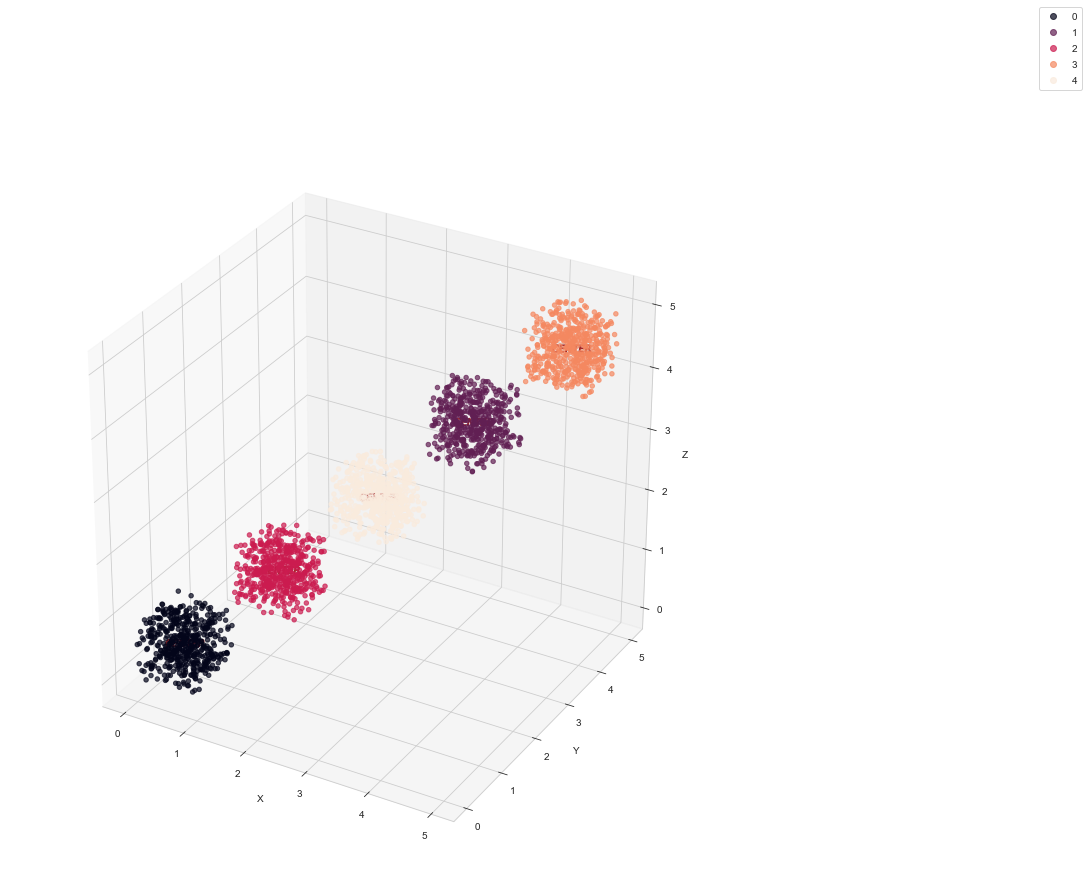

In [7]:
perfomance_3d(5)

# Let's see how to work with auto_clusters() function

*Our have the next physical meaning: the lower value of F_metric the better clusterisation. So if you want to find out which one number of clusters is more suitable for your problem you can stand on values of this metric.*

*Now let's considere next example to figure out with function. Just run the next cells.*

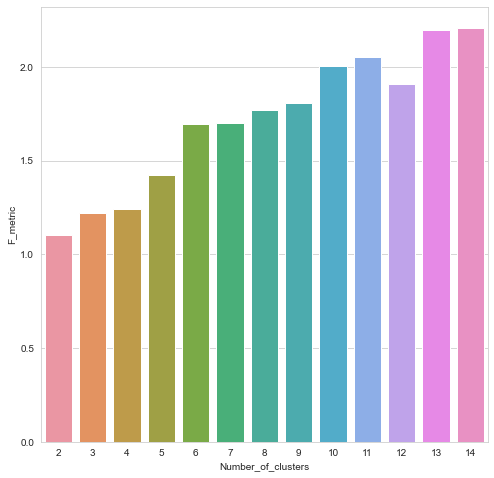

In [8]:
df = np.zeros((0, 2))
num_clusters = 3
for i in range(2, num_clusters):
    df = np.vstack((df, np.random.uniform(1, 2, size=(100,2))))

model = Kmeans(similiarity="euclidian", max_iter=15, auto_clusters=True)
model.fit(df)
metric_df =  pd.DataFrame(model.metric, columns={"F_metric"}).reset_index().rename(columns={"index": "Number_of_clusters"})
metric_df["Number_of_clusters"] += 2
plt.figure(figsize=(8, 8))
sns.barplot(data = metric_df, y="F_metric", x="Number_of_clusters")

Look at the plot. We can see that in out example the lowest values match to numbers of clusters: 2, 3 and maybe 4.</p>
So when you want to predict the number of clusters in your dataset as a benchmark you can use these values.

As usually you are free to play with parameters in the cell above.

<h1>Here we will test our model on several datasets with different numbers of rows and columns<h1>

# The first test - we sample arrays with identically shape but set the number of clusters with a difference of 10 times.
**Just runs cells and watch an output.**

In [9]:
time_start = time()
for i in range(100):
    df = np.zeros((0,2))
    for i in range(30):
        df = np.vstack((df, np.random.uniform(i, i + 1, size=(300,2))))
    model = Kmeans(num_clusters = 3, similiarity="euclidian")
    model.fit(df)
time_end = time()
print("Mean time of one fit() for model with num of clusters = 3: {} ms".format((time_end - time_start) * 10, '.2f'))

Mean time of one fit() for model with num of clusters = 3: 53.34378004074097 ms


In [10]:
time_start = time()
for i in range(100):
    df = np.zeros((0,2))
    for i in range(30):
        df = np.vstack((df, np.random.uniform(i, i + 1, size=(300,2))))
    model = Kmeans(num_clusters = 30, similiarity="euclidian")
    model.fit(df)
time_end = time()
print("Mean time of one fit() for model with num of clusters = 30: {} ms".format((time_end - time_start) * 10, '.2f'))

Mean time of one fit() for model with num of clusters = 30: 1087.9820275306702 ms


**We can't see dramatically difference between model with 3 and 30 clusters. In average an execution time difference in 20 times. It means that the execution time is in proportion with number of clusters with a some constant greater than 1.** 

# The next test - we sample arrays with different number of rows. The number of clusters is equal 2 for both models.


In [11]:
time_start = time()
for i in range(100):
    df = np.zeros((0,2))
    for i in range(10):
        df = np.vstack((df, np.random.uniform(i, i + 1, size=(300,2))))
    model = Kmeans(num_clusters = 2, similiarity="euclidian")
    model.fit(df)
time_end = time()
print("Mean time of one fit() for model with num of rows = 3000: {} ms".format((time_end - time_start) * 10, '.2f'))

Mean time of one fit() for model with num of rows = 3000: 7.419404983520508 ms


In [12]:
time_start = time()
for i in range(100):
    df = np.zeros((0,2))
    for i in range(1000):
        df = np.vstack((df, np.random.uniform(i, i + 1, size=(300,2))))
    model = Kmeans(num_clusters = 2, similiarity="euclidian")
    model.fit(df)
time_end = time()
print("Mean time of one fit() for model with num of rows = 300000: {} ms".format((time_end - time_start) * 10, '.2f'))

Mean time of one fit() for model with num of rows = 300000: 3302.008090019226 ms


**Here we see about 500 times increasing of the execution time in condition of increasing the row number in 100 times.**</p>
**It's seems like the execution time depends on the rows number linearly with some constant about 5.  What's next?**

# <h1>The third test - we sample arrays with different number of columns. The number of clusters is equal to 2 again.

In [13]:
time_start = time()
for i in range(100):
    df = np.zeros((0, 5))
    for i in range(10):
        df = np.vstack((df, np.random.uniform(i, i + 1, size=(300, 5))))
    model = Kmeans(num_clusters = 2, similiarity="euclidian")
    model.fit(df)
time_end = time()
print("Mean time of one fit() for model with num of columns = 5: {} ms".format((time_end - time_start) * 10, '.2f'))

Mean time of one fit() for model with num of columns = 5: 16.013243198394775 ms


In [14]:
time_start = time()
for i in range(100):
    df = np.zeros((0, 50))
    for i in range(10):
        df = np.vstack((df, np.random.uniform(i, i + 1, size=(300, 50))))
    model = Kmeans(num_clusters = 2, similiarity="euclidian")
    model.fit(df)
time_end = time()
print("Mean time of one fit() for model with num of columns = 50: {} ms".format((time_end - time_start) * 10, '.2f'))

Mean time of one fit() for model with num of columns = 50: 40.33559560775757 ms


**The watchings show that the execution time depends on the number of columns linearly with some constant about 0.3.**

# <h1>Noooow it's time to boost our model and add some powerfull features

# What's new?

* **New initialization funtion: for each cluster centr we sample  radndom num_clusters points from dataset and take such that:** 
    * *A weighted sum of the sum of distances from existed centroids and minimal distance from each existed centroids is maximal* 
* **Momentum method. We save information about previous steps and use its for more rapid convergence**

# New attributes

* **self.alpha** - The parametr is responsible for the speed of forgetting previous steps
* **self.lr** - The parametr is responsible for correction of centroids shift

<h1> One more comparasion with the previous model

In [29]:
time_start = time()
for i in range(50):
    df = np.zeros((0,10))
    for i in range(100):
        df = np.vstack((df, np.random.uniform(i, i + 1, size=(300,10))))
    model = Kmeans(num_clusters = 10, similiarity="euclidian", max_iter=20)
    model.fit(df)
time_end = time()
print("Mean time of one fit() for model with num of rows = 30000: {} ms".format((time_end - time_start) * 5, '.2f'))

Mean time of one fit() for model with num of rows = 30000: 370.1846408843994 ms


In [16]:
time_start = time()
for i in range(50):
    df = np.zeros((0,10))
    for i in range(100):
        df = np.vstack((df, np.random.uniform(i, i + 1, size=(300,10))))
    model = KmeansBoost(num_clusters = 10, similiarity="euclidian", max_iter=20)
    model.fit(df)
time_end = time()
print("Mean time of one fit() for model with num of rows = 30000: {} ms".format((time_end - time_start) * 5, '.2f'))

Mean time of one fit() for model with num of rows = 30000: 461.1121392250061 ms


# Despite on the new functions KmeansBoost shows almost the same execution time and usually  loose less than 30% percent of time other one.

# And now let's look at convergence

In [24]:
def comparasion_perfomance_2d(num_clusters):
    for it in range(2, num_clusters + 1):
        df = np.zeros((0,2))
        for i in range(it):
            df = np.vstack((df, np.random.uniform(i, i + 1, size=(500,2))))

        modelboost = KmeansBoost(num_clusters = it, similiarity="euclidian", max_iter=20)
        modelboost.fit(df)
        model = Kmeans(num_clusters = it, similiarity="euclidian", max_iter=20)
        model.fit(df)
        df = pd.DataFrame(df)
        df = df.rename(columns={ 0: "x", 1: "y"})
        for i in range(max(len(model.centroids_stack), len(modelboost.centroids_stack))):
            fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 10))
            if i <  len(model.centroids_stack):
                sns.scatterplot(data = df, x="x", y="y", hue=model.labels_stack[i], ax=ax1)
                sns.scatterplot(x=model.centroids_stack[i][:, 0], 
                                        y=model.centroids_stack[i][:, 1], marker="*", s=300, ax=ax1)
                ax1.set_xlabel("Vanila")
            if i >=  len(model.centroids_stack):
                j = len(model.centroids_stack) -1 
                sns.scatterplot(data = df, x="x", y="y", hue=model.labels_stack[j], ax=ax1 )
                sns.scatterplot(x=model.centroids_stack[j][:, 0], 
                                        y=model.centroids_stack[j][:, 1], marker="*", s=300, ax=ax1)
                ax1.set_xlabel("Vanila")
                
            if i < len(modelboost.centroids_stack):
                sns.scatterplot(data = df, x="x", y="y", hue=modelboost.labels_stack[i], ax=ax2)
                sns.scatterplot(x=modelboost.centroids_stack[i][:, 0], 
                                        y=modelboost.centroids_stack[i][:, 1], marker="*", s=300, ax=ax2)
                ax2.set_xlabel("Boost")
                
            if i >= len(modelboost.centroids_stack):
                j = len(modelboost.centroids_stack) - 1 
                sns.scatterplot(data = df, x="x", y="y", hue=modelboost.labels_stack[j], ax=ax2)
                sns.scatterplot(x=modelboost.centroids_stack[j][:, 0], 
                                        y=modelboost.centroids_stack[j][:, 1], marker="*", s=300, ax=ax2)
                ax2.set_xlabel("Boost")
            fig.show()
            plt.show()
            sleep(0.2)
            clear_output(wait=True)
        sleep(2)

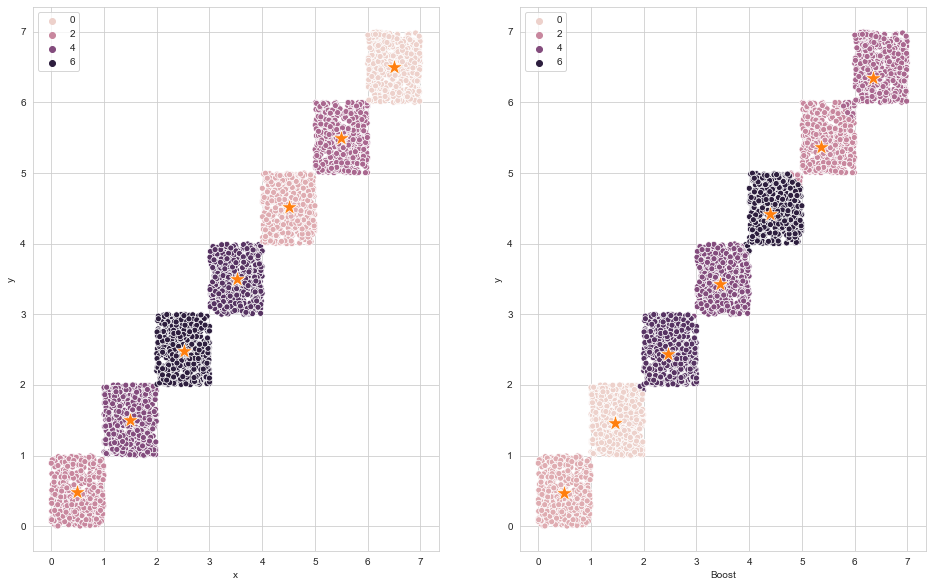

In [18]:
comparasion_perfomance_2d(7)

<h3>The practise shows that KmeansBoost is more reliable converge to correct centroids centers<h3>

# A little bit about disadvantages of Kmeans and its analogs

**Such algorithms expect that the data represent some structure which could be divided on independent peaces.
So if we give the data with complex and intricate structure our model won't understand how study correctly and we will get ridiculous clusters. Below is the classical example of behaviour.**

In [19]:
x_1 = np.linspace(0 , np.pi, num=200).reshape(-1, 1)
x_2 = np.linspace(np.pi,  2 * np.pi, num=200).reshape(-1, 1)
y_1 = np.sin(x_1) - .1
y_2 = np.sin(x_2) + .1
point = np.vstack((np.hstack((x_1, y_1)), np.hstack((x_2 - np.pi / 2 , y_2))))

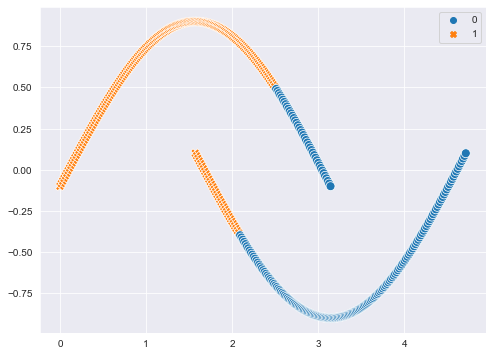

In [20]:
modelboost = KmeansBoost(num_clusters = 2, similiarity="euclidian", max_iter=20)
modelboost.fit(point)
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
sns.scatterplot(x=point[:, 0], y=point[:, 1], hue=modelboost.labels, style=modelboost.labels, s=80)

**For such or more complex task exist clustering algorithm such DBSCAN. Below is its work on the previous example.**

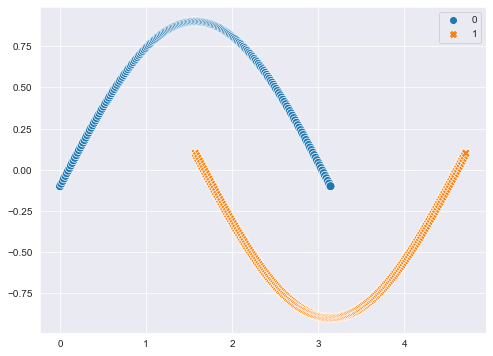

In [22]:
dbscan = DBSCAN()
dbscan.fit(point)

plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
sns.scatterplot(x=point[:, 0], y=point[:, 1], hue=dbscan.labels_, style=dbscan.labels_, s=80)

<h1>Extra part: distance matrix visualization

**Let's get dataset sklearn.dataset.make_blobs visualize distance matrixes**</p>
**We just will rank labels by their frequencies in the labels set by the model.**


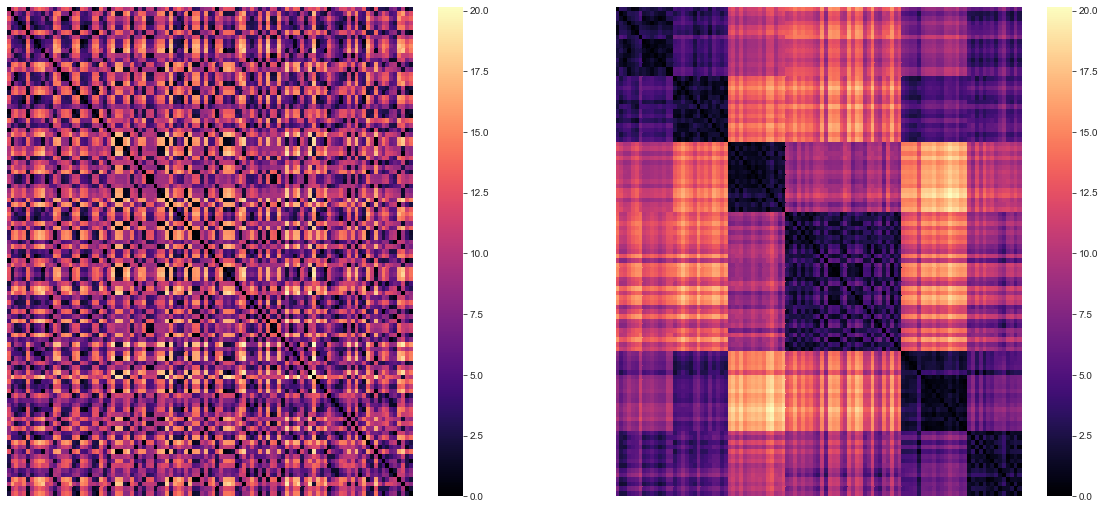

In [23]:
for i in range(2, 8):
    df, _ = make_blobs(n_features=2, n_samples=i * 15, centers=i, cluster_std=np.random.randint(3))
    model = KmeansBoost(num_clusters=i, max_iter=20)
    model.fit(df)
    labels = model.labels
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))
    distance = np.zeros((df.shape[0], df.shape[0]))
    for row in range(df.shape[0]):
        distance[row, :] = np.sqrt(np.sum(np.square(df - df[row, :]), axis=1)).reshape(1, -1)
    sns.heatmap(distance, cmap="magma",  xticklabels=False, yticklabels=False, ax=ax1)
    values = np.flip(np.unique(labels))
    
    new_df = np.zeros((0, df.shape[1]))
    for label in values:
        new_df = np.vstack((new_df, df[labels==label, :]))
    fix_distances =  np.zeros((df.shape[0], df.shape[0]))
    for row in range(new_df.shape[0]):
        fix_distances[row, :] = np.sqrt(np.sum(np.square(new_df - new_df[row, :]), axis=1)).reshape(1, -1)
    sns.heatmap(fix_distances, cmap="magma",  xticklabels=False, yticklabels=False, ax=ax2)  
    fig.show()
    plt.show() 
    sleep(3)
    clear_output(wait=True)
   

<h2>$$That's \;all! \;Thanks \;for \;your \;attention!$$<h2>
$$I \;hope \;you \;have \;spent \;time \;with \;enjoy. \;Follow \;me \;and \;check \;other \;repositories.$$ <h2>
 $$See you.  \;Bye$$